In [1]:
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#           0/1     1/2  2/3     3/4   4/5              5/6          6/7
# format is station,date,measure,value,measurement flag,quality flag,source flag

In [3]:
stations = {}

with open('201X_TMAX.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('maxes', []).append(value)

with open('201X_TMIN.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('mins', []).append(value)

In [4]:
len(stations)  # previously 13946 with just 2019 data...

19754

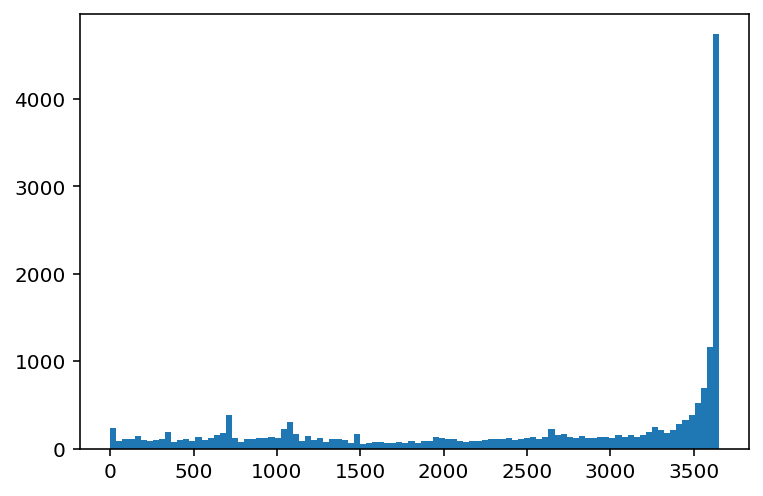

In [5]:
_ = plt.hist([len(values.get('mins', [])) for values in stations.values()], bins=100)

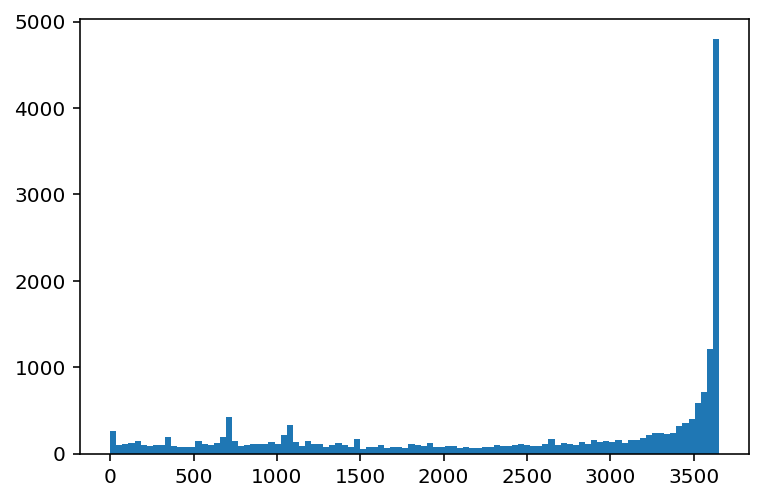

In [6]:
_ = plt.hist([len(values.get('maxes', [])) for values in stations.values()], bins=100)

In [7]:
# Okay! I may get a lot more spots!
# Proceeding without worrying about whether some stations only report in summer (etc.)...

In [8]:
min_days = 350
low_data = [station for station, data in stations.items()
            if len(data.get('maxes', [])) < min_days or
               len(data.get('mins', [])) < min_days]

In [9]:
len(low_data)  # previously: 5555

1248

In [10]:
for station in low_data:
    del stations[station]

In [11]:
len(stations)  # previously: 8391

18506

In [12]:
cold, hot = 0, 27

In [13]:
scores = []
for station, data in stations.items():
    heat = [temp > hot
            for temp in data['maxes']]
    heat = sum(heat) / len(heat)
    cool = [temp < cold
            for temp in data['mins']]
    cool = sum(cool) / len(cool)
    scores.append([station, heat, cool, heat + cool])

In [14]:
len(scores)  # previously: 8391

18506

In [15]:
scores.sort(key=lambda line: line[3])

In [16]:
scores[:10]

[['FSM00061996', 0.0, 0.0, 0.0],
 ['MXN00007339', 0.0, 0.0, 0.0],
 ['MXN00012150', 0.0, 0.0, 0.0],
 ['MXN00012228', 0.0, 0.0, 0.0],
 ['MXN00015070', 0.0, 0.0, 0.0],
 ['MXN00015199', 0.0, 0.0, 0.0],
 ['MXN00015231', 0.0, 0.0, 0.0],
 ['MXN00020342', 0.0, 0.0, 0.0],
 ['MXN00030178', 0.0, 0.0, 0.0],
 ['USC00511303', 0.0, 0.0, 0.0]]

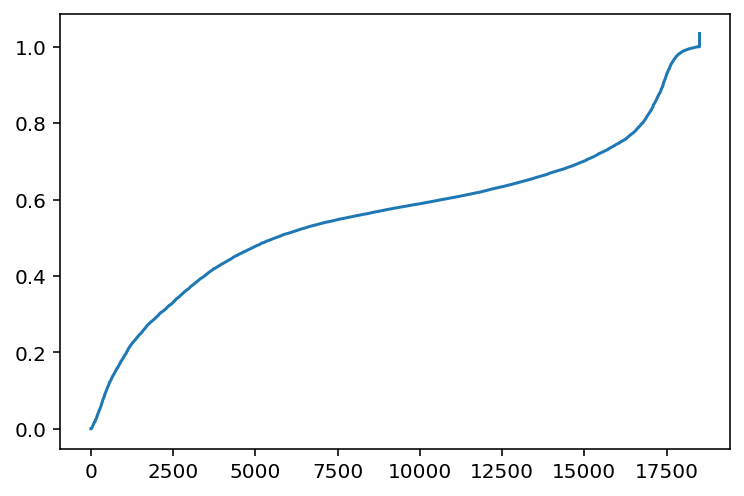

In [17]:
# total
plt.plot([line[3] for line in scores])

In [18]:
# _very_ few places are habitable!

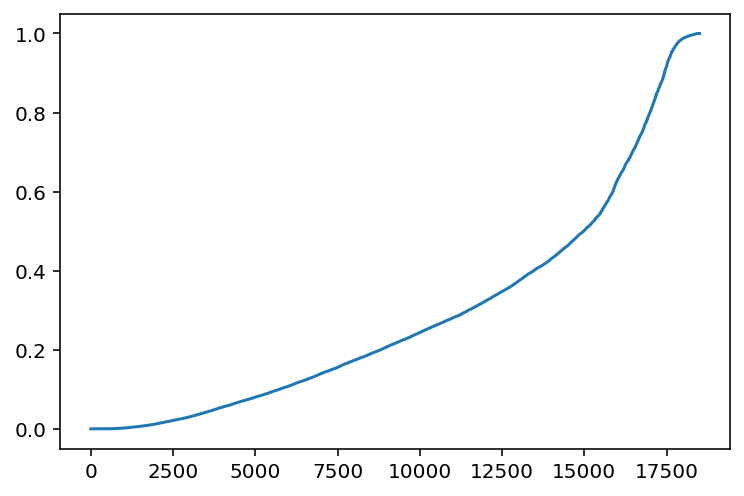

In [19]:
# heat
scores.sort(key=lambda line: line[1])
plt.plot([line[1] for line in scores])

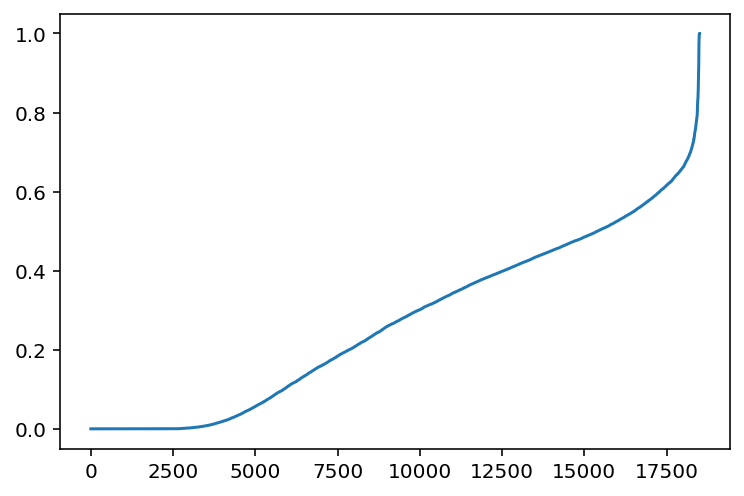

In [20]:
# cool
scores.sort(key=lambda line: line[2])
plt.plot([line[2] for line in scores])

In [21]:
# definitely more violation for cold...
# should I adjust the targets?

In [22]:
locations = {}
with open('ghcnd-stations.txt') as f:
    for line in f:
        line = line.split()
        locations[line[0]] = [float(line[1]), float(line[2]), ' '.join(line[4:])]

In [23]:
results = []
for line in scores:
    if line[0] not in locations:
        continue
    results.append(line + locations[line[0]])

In [24]:
results[0]

['FSM00061996', 0.0, 0.0, 0.0, -37.8, 77.5, 'MARTIN DE VIVIES (I GSN 61996']

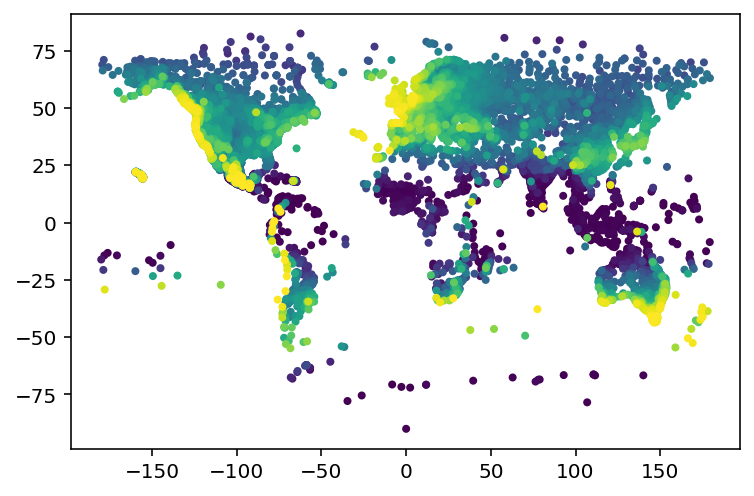

In [29]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - line[3] if line[3] < 1 else 0 for line in results],
            marker='.')

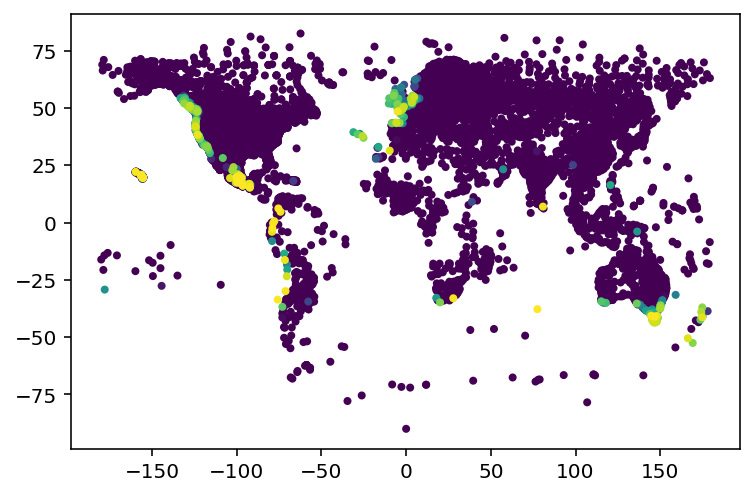

In [28]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - (10 * line[3]) if line[3] < 0.1 else 0 for line in results],
            marker='.')

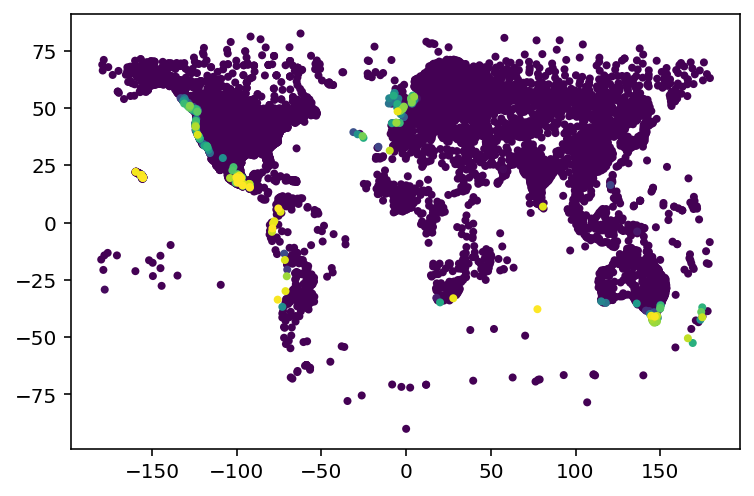

In [35]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - (20 * line[3]) if line[3] < 0.05 else 0 for line in results],
            marker='.')

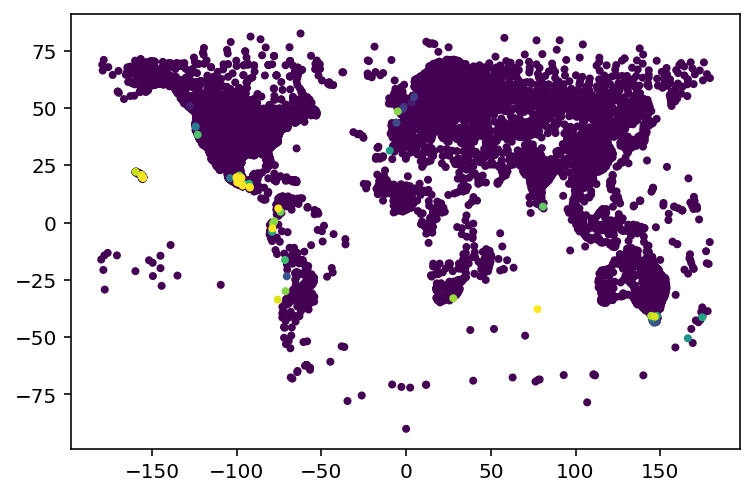

In [38]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - (100 * line[3]) if line[3] < 0.01 else 0 for line in results],
            marker='.')

In [27]:
# probably the best coverage I'll get from these?

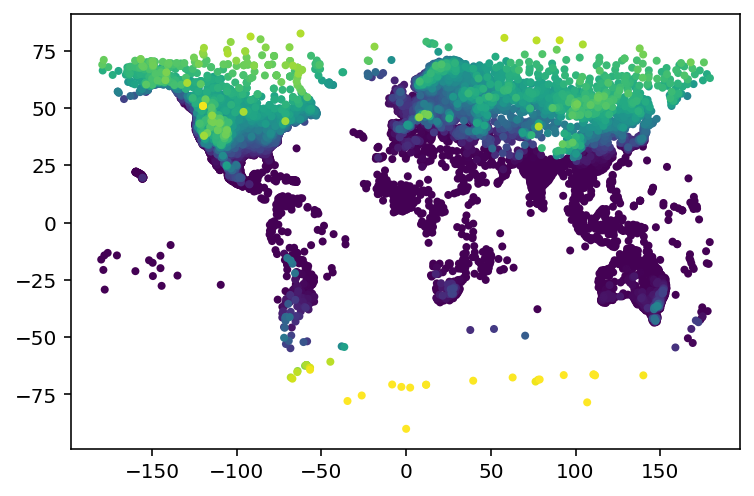

In [36]:
# too cold
results.sort(key=lambda line: line[2])  # draw cold places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[line[2] for line in results],
            marker='.')

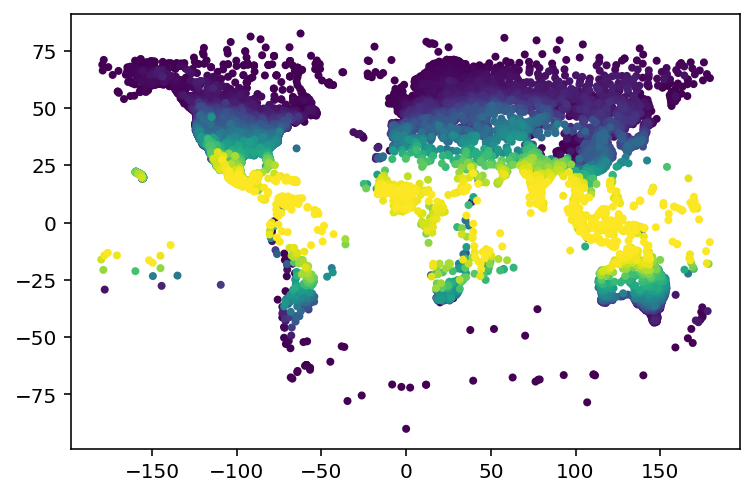

In [37]:
# too hot
results.sort(key=lambda line: line[1])  # draw hot places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[line[1] for line in results],
            marker='.')

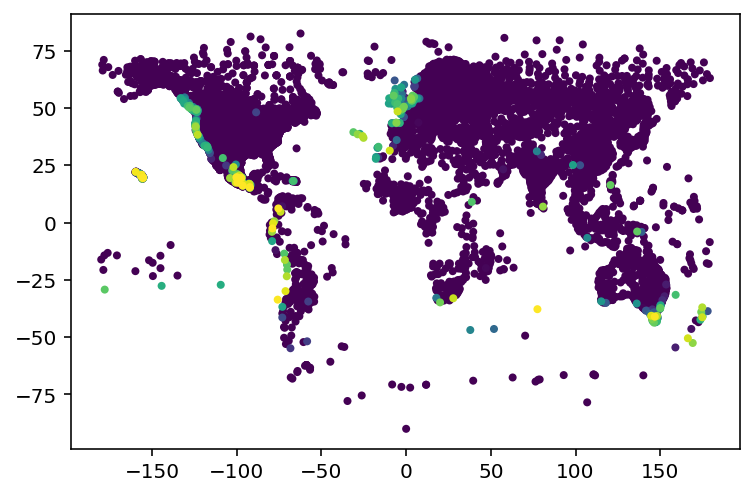

In [28]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - line[3] if line[3] < 1 else 0 for line in results],
            marker='.')

In [29]:
# Mexico! Mexico is dope!